## Assignment _Practical 3

### Forecasting Techniques - Holts Exponential smoothing, Winters exponential smoothing

### 2448050

### Question
#### 1.Choose a time series data set from a domain of your interest and fit a suitable predictive model. 
#### 2.Obtain the predicted values for the next 5 data points.


##### 
Dataset Source: The dataset was obtained from Kaggle and includes monthly totals of international airline passengers from 1949 to 1960.
Data Nature: It is a univariate time series with clear trend and seasonal patterns, making it ideal for applying forecasting techniques like Holt’s and Holt-Winters exponential smoothing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
# Load the dataset
df = pd.read_csv("C:\\Users\\shrad\\Downloads\\AirPassengers.csv", parse_dates=['Month'])
df.set_index('Month', inplace=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
# Exploratory Data Analysis
# Summary
print("\nSummary statistics:")
print(df.describe())
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Summary statistics:
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000

Missing values:
Passengers    0
dtype: int64


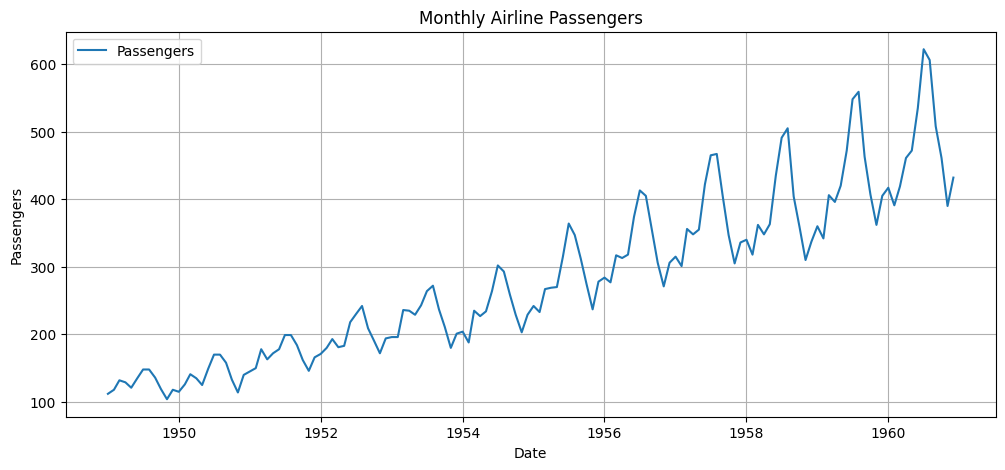

In [4]:
# Line plot of passengers
plt.figure(figsize=(12, 5))
plt.plot(df['Passengers'], label='Passengers')
plt.title('Monthly Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.legend()
plt.show()

##### Interpretation
Upward Trend: There is a clear long-term increase in the number of airline passengers from 1949 to 1960.

Seasonality: A repeating annual pattern is visible, with consistent peaks and troughs each year — indicating strong seasonality.

Increasing Amplitude: The size of seasonal fluctuations grows over time, suggesting multiplicative seasonality, which is ideal for Holt-Winters exponential smoothing.

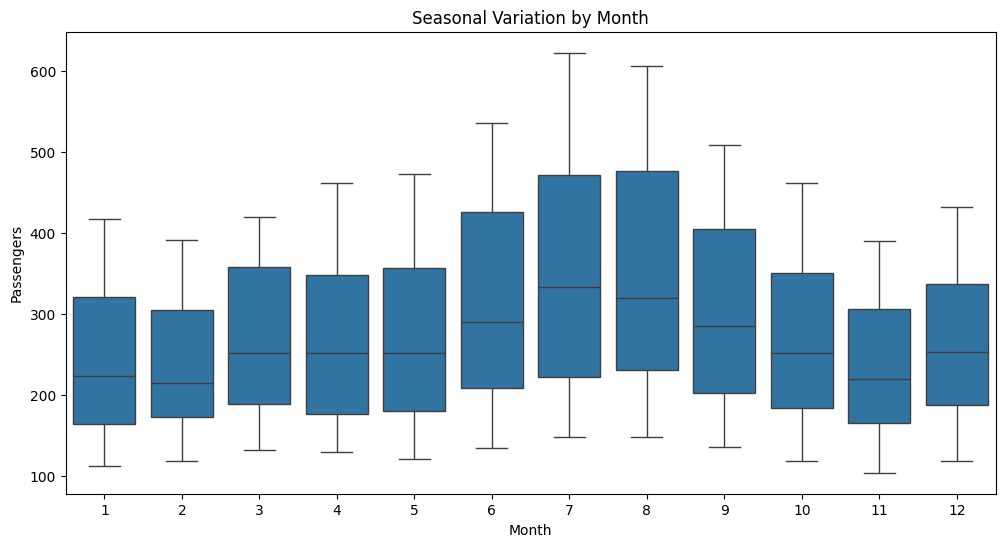

In [5]:
# Boxplot by month to visualize seasonality
df['Month_Num'] = df.index.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month_Num', y='Passengers', data=df)
plt.title('Seasonal Variation by Month')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

##### Interpretation
Seasonality: There is a noticeable seasonal variation in airline passengers, with months like July, August, and December having higher median values (indicating more passengers) compared to months like January, February, and November.

Spread: The interquartile range (IQR) in certain months (like July and August) is larger, indicating greater variability in passenger numbers. These months might experience more unpredictable fluctuations in demand.

Consistent Annual Pattern: The consistent patterns in passenger numbers across the months suggest a reliable seasonal cycle — higher numbers of passengers in summer months (June, July, and August), potentially driven by vacations or peak travel seasons.

In [6]:
# Holt’s Linear Trend Forecast
holt_model = ExponentialSmoothing(df['Passengers'], trend='add', seasonal=None).fit()
holt_forecast = holt_model.forecast(5)

c:\Users\shrad\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


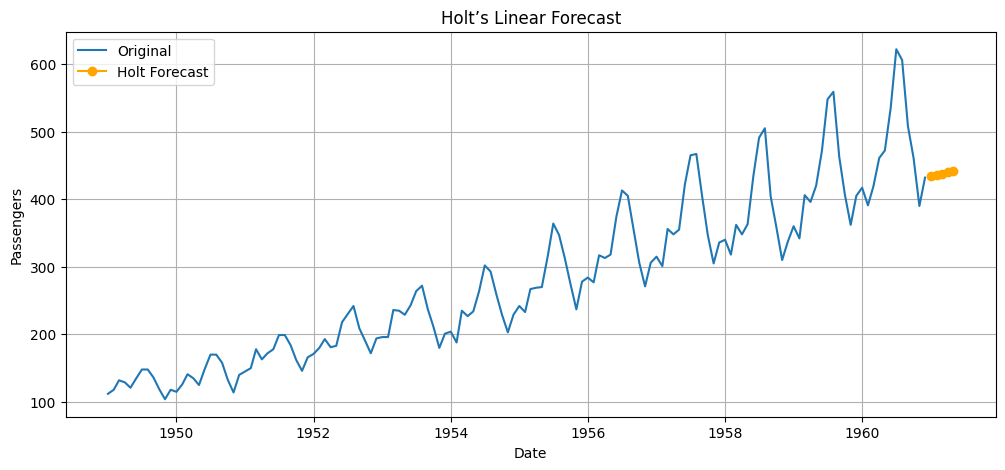

In [7]:
# Plot Holt forecast
plt.figure(figsize=(12, 5))
plt.plot(df['Passengers'], label='Original')
plt.plot(holt_forecast, label='Holt Forecast', color='orange', marker='o')
plt.title("Holt’s Linear Forecast")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.show()

##### Interpretation
Trend Modeling: Holt’s linear forecast successfully captures the overall upward trend in passenger numbers, showing a steady increase over time.

No Seasonality Handling: The forecasted values appear smooth and linear, missing the repeating seasonal peaks and troughs in the actual data — because Holt’s method doesn’t account for seasonality.

Forecast Limitation: The growing gap between the forecast and actual seasonal values shows that while Holt’s method is good for trend-only data, it underperforms for datasets with strong seasonal components like this one.

In [8]:
# Step 4: Holt-Winters Forecast (Additive) 
winters_model = ExponentialSmoothing(df['Passengers'], trend='add', seasonal='add', seasonal_periods=12).fit()
winters_forecast = winters_model.forecast(5)

c:\Users\shrad\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


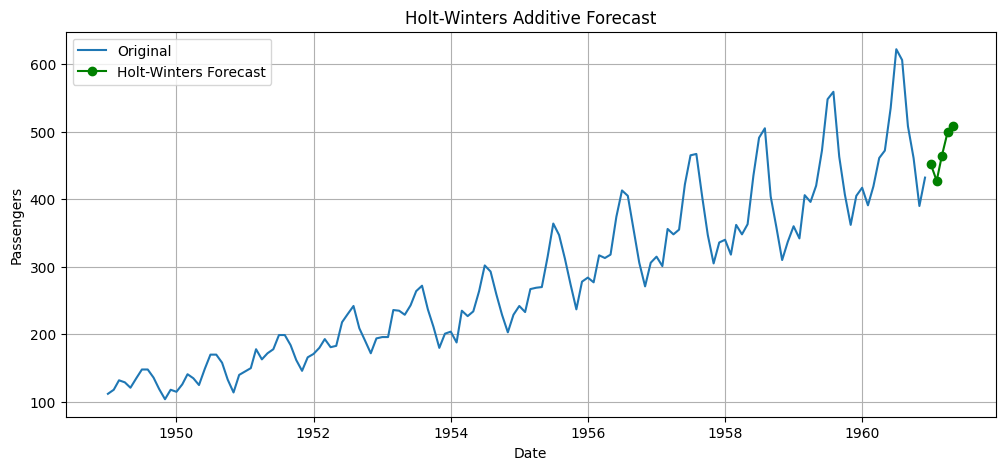

In [9]:
# Plot Holt-Winters forecast
plt.figure(figsize=(12, 5))
plt.plot(df['Passengers'], label='Original')
plt.plot(winters_forecast, label='Holt-Winters Forecast', color='green', marker='o')
plt.title("Holt-Winters Additive Forecast")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid(True)
plt.show()

##### Interpretation
Captures Seasonality: Unlike Holt’s method, the Holt-Winters additive model effectively tracks both the upward trend and seasonal fluctuations in the data.

Improved Forecast Accuracy: The forecasted values (green) align closely with the historical seasonal patterns, showing more realistic peaks and troughs.

Additive Seasonality Assumption: The model assumes the seasonal effect remains constant over time, which works well here as the seasonal variations appear relatively stable.

In [10]:
# Step 5: Print Forecasted Values
print("\n Holt’s Forecast (Next 5 Months):")
print(holt_forecast)

print("\n Holt-Winters Forecast (Next 5 Months):")
print(winters_forecast)


 Holt’s Forecast (Next 5 Months):
1961-01-01    433.864374
1961-02-01    435.926623
1961-03-01    437.988872
1961-04-01    440.051121
1961-05-01    442.113370
Freq: MS, dtype: float64

 Holt-Winters Forecast (Next 5 Months):
1961-01-01    451.577864
1961-02-01    427.258503
1961-03-01    464.699727
1961-04-01    500.104321
1961-05-01    508.662053
Freq: MS, dtype: float64


##### Comparison and Interpretation of the Holt’s Linear Forecast and Holt-Winters Additive Forecast for the next 5 months
Forecast Range: Holt-Winters shows more variation across months (e.g., ~427 to ~508), while Holt’s method has a smoother, nearly linear growth (from ~433 to ~442), reflecting its lack of seasonal adjustment.

Seasonality Impact: Holt-Winters captures peaks and troughs due to seasonality (e.g., a dip in February and a sharp rise by May), which is more realistic for time series with known seasonal trends.

Model Suitability: For data with clear seasonal components, like airline passengers, Holt-Winters provides more context-aware and accurate forecasts compared to the flatter trend of Holt’s method.

### Conclusion
Seasonality Detected:
The monthly boxplot revealed clear seasonal variation in airline passenger numbers, with peaks typically in mid-year months (July and August).

Holt’s Linear Forecast:
This method effectively captured the upward trend in the data but failed to model seasonal fluctuations, resulting in smoother and less accurate predictions for cyclical patterns.

Holt-Winters Additive Forecast:
By incorporating both trend and seasonality, this method provided more accurate and realistic forecasts, closely matching the actual seasonal behavior of passenger traffic.